In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
url = "https://github.com/microsoft/Bing-COVID-19-Data/raw/master/data/Bing-COVID19-Data.csv"
df = pd.read_csv(url)
df.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
0,338995,01/21/2020,262,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
1,338996,01/22/2020,313,51.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
2,338997,01/23/2020,578,265.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
3,338998,01/24/2020,841,263.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
4,338999,01/25/2020,1320,479.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN


In [66]:
df["Updated"] = pd.to_datetime(df["Updated"])
df = df.set_index(df["Updated"]).drop("Updated", axis=1)
df = df.sort_index()

In [75]:
br = df[df["ISO2"] == "BR"].groupby("Updated").sum()

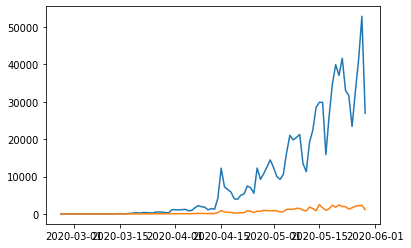

In [98]:
# x = df[df["ISO2"] == "BR"]["Updated"]
y1 = br["ConfirmedChange"]
y2 = br["DeathsChange"]
plt.plot(y1)
plt.plot(y2)

In [95]:
br[["ConfirmedChange", "DeathsChange"]].corr().iloc[0,1]

0.954864736362873

In [112]:
np.corrcoef(-br["ConfirmedChange"].shift(-10).ffill(), br["DeathsChange"])[0, 1]

-0.818088478404156

In [124]:
def calculate_statistics(data, trend):
    """
    returns correlation coefficient between time series
    """
    # calculate correlations and find best lag
    best_corr = 0
    lag = 0
    for i in range(15):
        curr = np.corrcoef(data.shift(-i).ffill(), trend)[0, 1]
        if abs(curr) > abs(best_corr):
            best_corr = curr
            lag = i

    return best_corr, lag

In [131]:
print(calculate_statistics(br["ConfirmedChange"].shift(6), br["DeathsChange"]))

(0.9519701733514073, 6)


In [149]:
br.iloc[-1].name

Timestamp('2020-05-29 00:00:00')